In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
books= pd.read_csv('Books.csv')
ratings= pd.read_csv('Ratings.csv')
user= pd.read_csv('Users.csv')

In [4]:
print(books.shape)
print(ratings.shape)
print(user.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [7]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
print(books.duplicated().sum())
print(ratings.duplicated().sum())
print(user.duplicated().sum())

0
0
0


In [9]:
print("-----Book.csv Information")
print(books.info())
print("\n------Rating.csv Information")
print(ratings.info())
print("\n-------User.csv Information")
print(user.info())

-----Book.csv Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

------Rating.csv Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2  

In [10]:
## EDA

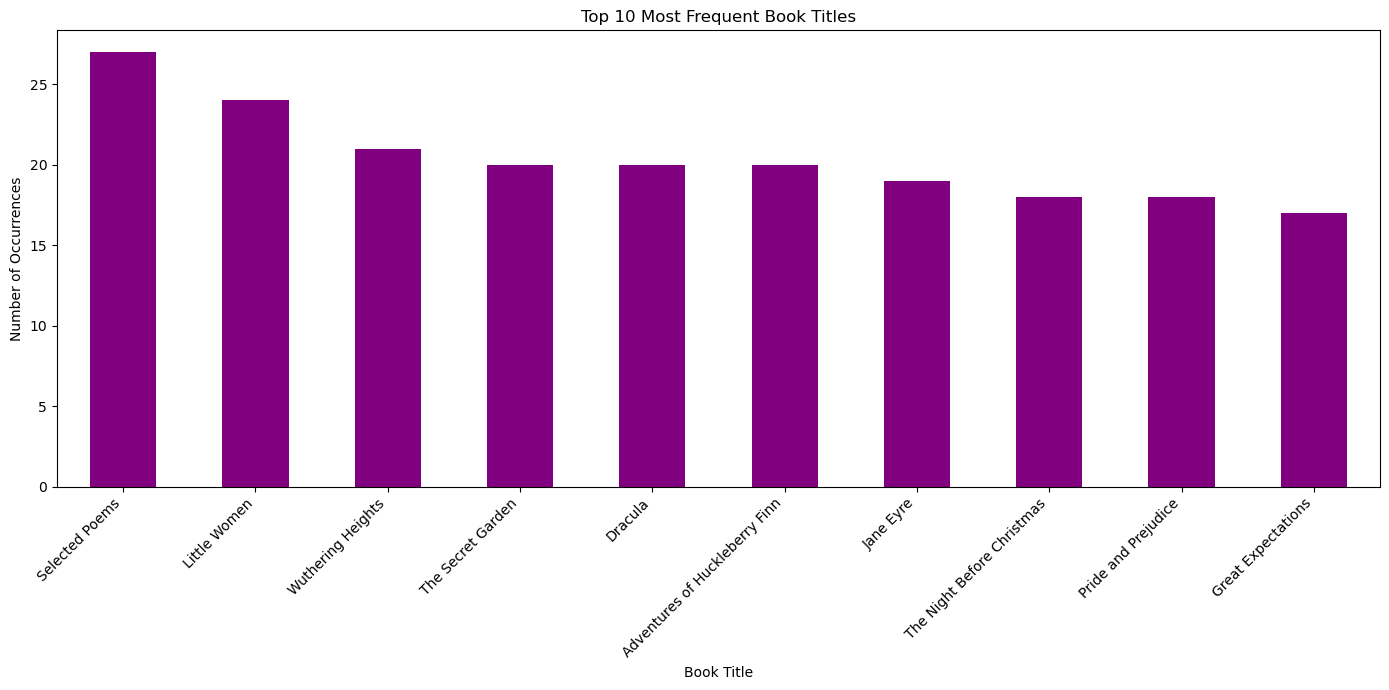

Bar plot for top 10 Book Titles displayed successfully.


In [11]:
top_book_titles = books['Book-Title'].value_counts().head(10)

plt.figure(figsize=(14, 7))
top_book_titles.plot(kind='bar', color='purple')
plt.title('Top 10 Most Frequent Book Titles')
plt.xlabel('Book Title')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot for top 10 Book Titles displayed successfully.")

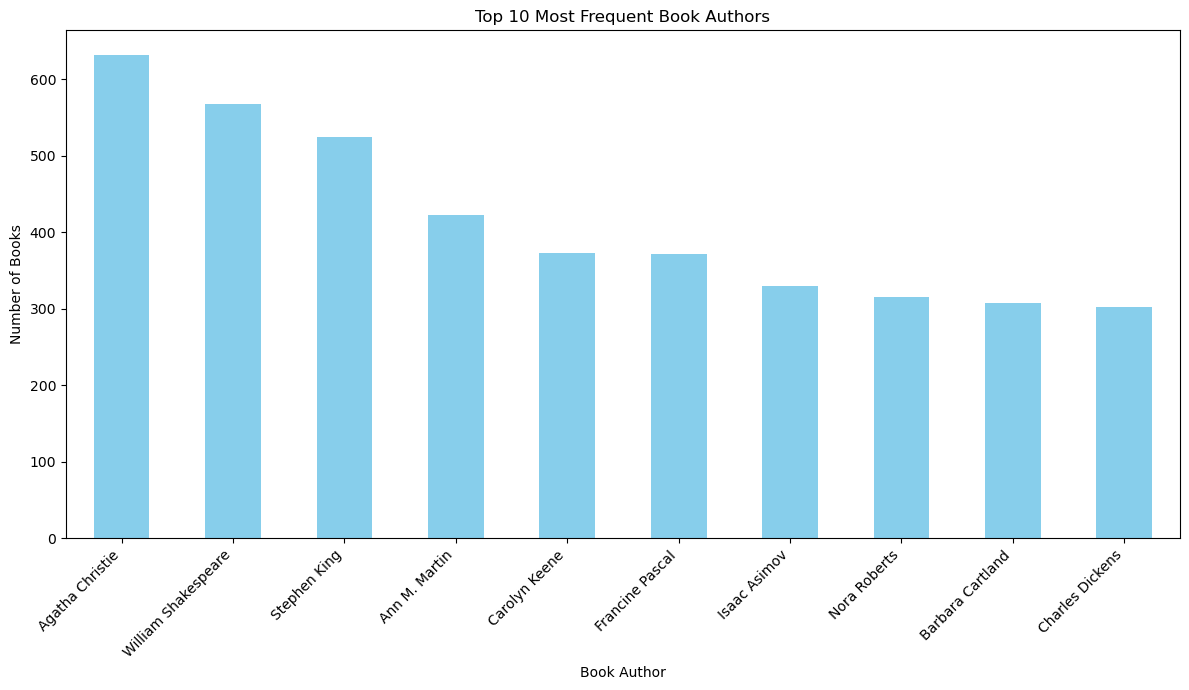

Bar plot for top 10 Book Authors displayed successfully.


In [12]:
top_authors = books['Book-Author'].value_counts().head(10)

plt.figure(figsize=(12, 7))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Book Authors')
plt.xlabel('Book Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot for top 10 Book Authors displayed successfully.")

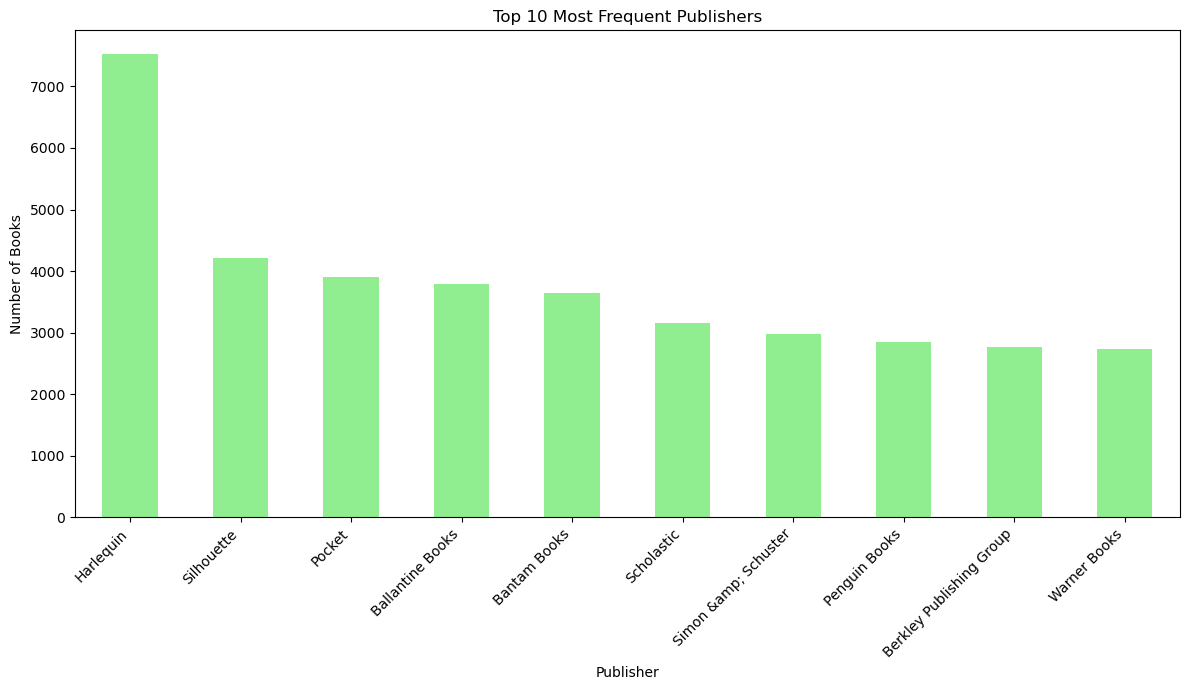

Bar plot for top 10 Publishers displayed successfully.


In [13]:
top_publishers = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 7))
top_publishers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Frequent Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot for top 10 Publishers displayed successfully.")

In [14]:
books['Year-Of-Publication'] = pd.to_numeric(
    books['Year-Of-Publication'], errors='coerce'
)


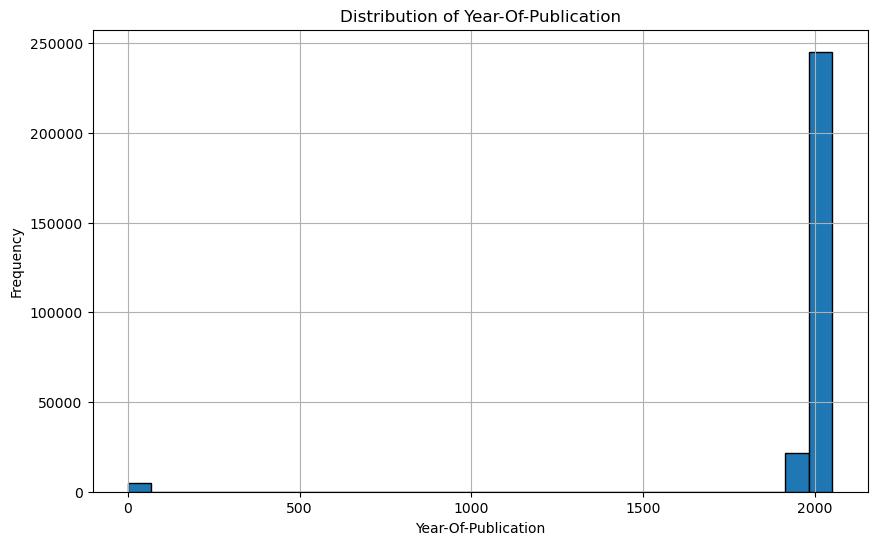

Histogram for 'Year-Of-Publication' displayed successfully.


In [15]:
plt.figure(figsize=(10, 6))
plt.hist(books['Year-Of-Publication'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Year-Of-Publication')
plt.xlabel('Year-Of-Publication')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("Histogram for 'Year-Of-Publication' displayed successfully.")

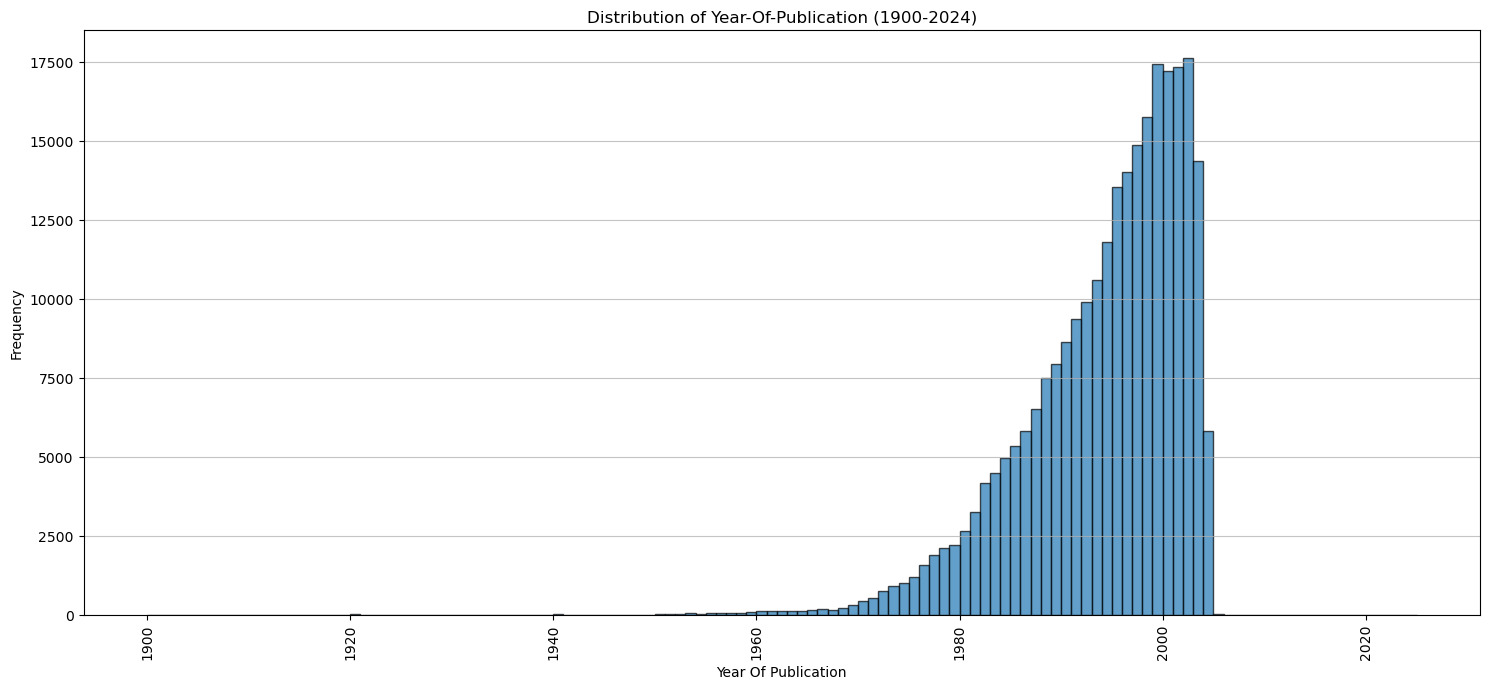

Modified histogram for 'Year-Of-Publication' displayed successfully.


In [16]:
# Filter out anomalous years (0 and 2050) and limit to the range 1900-2024
filtered_years = books['Year-Of-Publication'].dropna()
filtered_years = filtered_years[(filtered_years >= 1900) & (filtered_years <= 2024)]

plt.figure(figsize=(15, 7))
# Calculate bins for individual years in the specified range
bins = range(int(filtered_years.min()), int(filtered_years.max()) + 2)
plt.hist(filtered_years, bins=bins, edgecolor='black', alpha=0.7)

plt.title('Distribution of Year-Of-Publication (1900-2024)')
plt.xlabel('Year Of Publication')
plt.ylabel('Frequency')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
print("Modified histogram for 'Year-Of-Publication' displayed successfully.")

In [17]:
merged_df = pd.merge(ratings, books, on='ISBN')
print("Merged DataFrame 'merged_df' created successfully. Displaying the first 5 rows:")
print(merged_df.head())

Merged DataFrame 'merged_df' created successfully. Displaying the first 5 rows:
   User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1   276726  0155061224            5   
2   276727  0446520802            0   
3   276729  052165615X            3   
4   276729  0521795028            6   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

   Year-Of-Publication                   Publisher  \
0               2002.0            Ballantine Books   
1               2001.0                      Heinle   
2               1996.0                Warner Books   
3               1999.0  Cambri

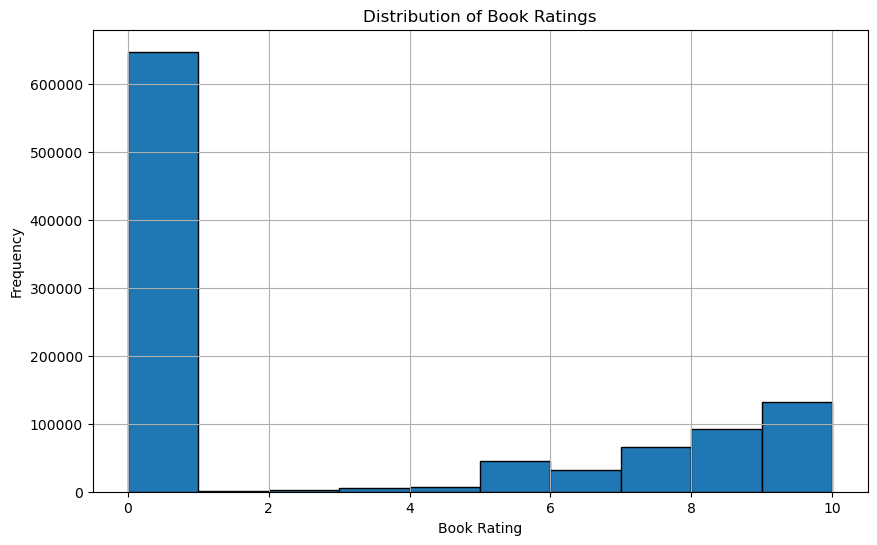

Histogram of Book Ratings displayed successfully.


In [18]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Book-Rating'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("Histogram of Book Ratings displayed successfully.")

In [19]:
top_10_authors_by_ratings = merged_df['Book-Author'].value_counts().head(10).index
print("Top 10 authors by number of ratings:\n", top_10_authors_by_ratings)

Top 10 authors by number of ratings:
 Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'James Patterson',
       'Mary Higgins Clark', 'Dean R. Koontz', 'Tom Clancy', 'Danielle Steel',
       'Sue Grafton', 'Janet Evanovich'],
      dtype='object', name='Book-Author')


In [20]:
filtered_df_top_authors_ratings = merged_df[merged_df['Book-Author'].isin(top_10_authors_by_ratings)]
print("DataFrame filtered for top 10 authors' ratings. Displaying first 5 rows:")
print(filtered_df_top_authors_ratings.head())

DataFrame filtered for top 10 authors' ratings. Displaying first 5 rows:
    User-ID        ISBN  Book-Rating                               Book-Title  \
7    276746  0425115801            0                                Lightning   
23   276754  0684867621            8  The Girl Who Loved Tom Gordon : A Novel   
28   276762  0451167317            0                            The Dark Half   
61   276788  055310666X           10                             False Memory   
68   276798  3453115783            0    Tom Clancy's Op- Center. Spiegelbild.   

       Book-Author  Year-Of-Publication                 Publisher  \
7   Dean R. Koontz               1996.0  Berkley Publishing Group   
23    Stephen King               1999.0                  Scribner   
28    Stephen King               1994.0               Signet Book   
61  Dean R. Koontz               1999.0              Bantam Books   
68      Tom Clancy               1996.0                     Heyne   

                         

In [21]:
average_ratings_top_authors = filtered_df_top_authors_ratings.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False)
print("Average ratings for top 10 authors:\n", average_ratings_top_authors)

Average ratings for top 10 authors:
 Book-Author
Stephen King          3.606287
Janet Evanovich       3.533731
John Grisham          3.192013
James Patterson       3.143713
Sue Grafton           2.758750
Nora Roberts          2.659390
Mary Higgins Clark    2.634080
Dean R. Koontz        2.589613
Tom Clancy            2.221754
Danielle Steel        2.079442
Name: Book-Rating, dtype: float64


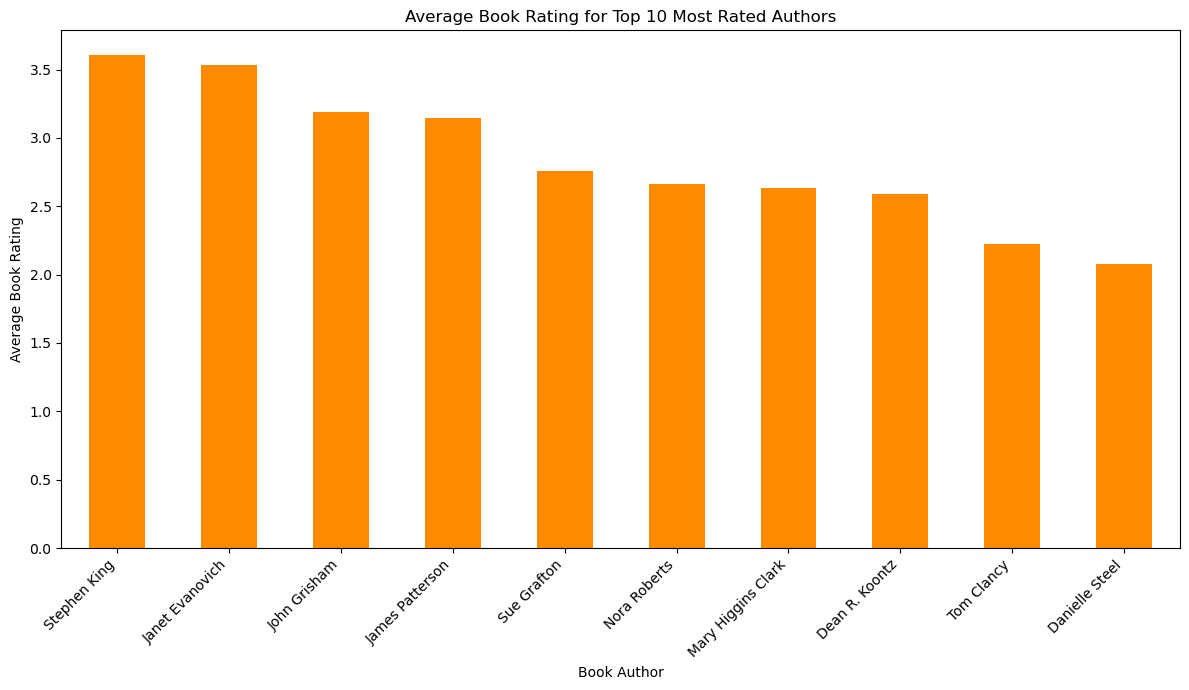

In [22]:
plt.figure(figsize=(12, 7))
average_ratings_top_authors.plot(kind='bar', color='darkorange')
plt.title('Average Book Rating for Top 10 Most Rated Authors')
plt.xlabel('Book Author')
plt.ylabel('Average Book Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
top_10_publishers_names = top_publishers.index

filtered_df_top_publishers_ratings = merged_df[merged_df['Publisher'].isin(top_10_publishers_names)]

average_ratings_top_publishers = filtered_df_top_publishers_ratings.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending=False)

print("Average ratings for top 10 publishers:\n", average_ratings_top_publishers)

Average ratings for top 10 publishers:
 Publisher
Penguin Books               3.203898
Simon &amp; Schuster        2.882148
Ballantine Books            2.801204
Warner Books                2.671293
Pocket                      2.498671
Scholastic                  2.451544
Berkley Publishing Group    2.424827
Bantam Books                2.327824
Silhouette                  1.646574
Harlequin                   1.439925
Name: Book-Rating, dtype: float64


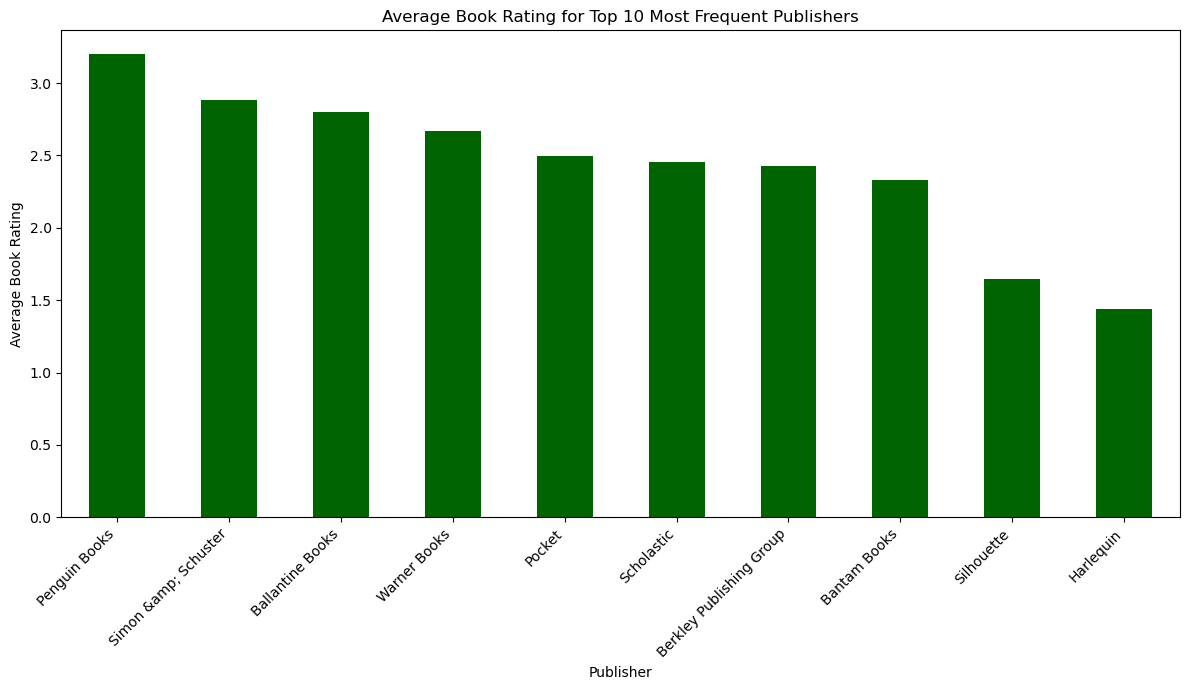

In [24]:
plt.figure(figsize=(12, 7))
average_ratings_top_publishers.plot(kind='bar', color='darkgreen')
plt.title('Average Book Rating for Top 10 Most Frequent Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Book Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## POPULARITY-BASED-RECOMMENDATION

In [25]:
num_rating_df = merged_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [26]:
merged_df['Book-Rating'] = pd.to_numeric(merged_df['Book-Rating'], errors='coerce')


In [27]:
avg_rating_df = (
    merged_df
    .groupby('Book-Title')['Book-Rating']
    .mean()
    .reset_index()
    .rename(columns={'Book-Rating': 'avg_ratings'}))
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [28]:
popl_df= num_rating_df.merge(avg_rating_df,on='Book-Title')
popl_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [29]:
popl_df=popl_df[popl_df['num_ratings']>=200].sort_values('avg_ratings',ascending=False).head(50)
popl_df

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [30]:
popl_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,249,5.409639
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
30,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
32,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769


## COLABRATIVE FILTERING BASED RECOMMENDER SYSTEM

In [31]:
x= merged_df.groupby('User-ID').count()['Book-Rating']>100
user_100 = x[x].index

In [32]:
user_100

Index([   254,    507,    882,   1424,   1435,   1733,   1903,   2033,   2110,
         2276,
       ...
       275020, 275970, 276463, 276680, 277427, 277478, 277639, 278137, 278188,
       278418],
      dtype='int64', name='User-ID', length=1648)

In [33]:
filtered_rating=merged_df[merged_df['User-ID'].isin(user_100)]

In [34]:
y= filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [35]:
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1070)

In [36]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [37]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1030947,276680,0688163165,10,Mystic River,Dennis Lehane,2001.0,William Morrow &amp; Company,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...
1030953,276680,0743411323,0,Never Change,Elizabeth Berg,2001.0,Atria,http://images.amazon.com/images/P/0743411323.0...,http://images.amazon.com/images/P/0743411323.0...,http://images.amazon.com/images/P/0743411323.0...
1030957,276680,0743422449,0,Mercy,Jodi Picoult,2001.0,Washington Square Press,http://images.amazon.com/images/P/0743422449.0...,http://images.amazon.com/images/P/0743422449.0...,http://images.amazon.com/images/P/0743422449.0...
1030962,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003.0,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...


In [38]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pt.fillna(0,inplace=True)

In [40]:
pt

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
cosine_similarity=cosine_similarity(pt)
cosine_similarity

array([[1.        , 0.06550754, 0.09317747, ..., 0.07547772, 0.05810769,
        0.03029366],
       [0.06550754, 1.        , 0.02247675, ..., 0.04739871, 0.13548709,
        0.12388301],
       [0.09317747, 0.02247675, 1.        , ..., 0.09310325, 0.        ,
        0.        ],
       ...,
       [0.07547772, 0.04739871, 0.09310325, ..., 1.        , 0.05583662,
        0.0137213 ],
       [0.05810769, 0.13548709, 0.        , ..., 0.05583662, 1.        ,
        0.09410287],
       [0.03029366, 0.12388301, 0.        , ..., 0.0137213 , 0.09410287,
        1.        ]])

In [43]:
cosine_similarity.shape

(1070, 1070)

In [44]:
def recommended_book(book_name):
   
    index= np.where(book_name==pt.index)[0][0]
    similar=sorted(list(enumerate(cosine_similarity[index])),reverse=True,key=lambda x:x[1])[1:6]
    data = [ ]
    for i in similar:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data




In [45]:
recommended_book('Message in a Bottle')

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['The Mulberry Tree',
  'Jude Deveraux',
  'http://images.amazon.com/images/P/0743437640.01.MZZZZZZZ.jpg']]

In [46]:
#Books file is big so unable to upload it on github so we are taking only the necessary columns from the file
# Keep only necessary columns
books_small = books[['Book-Title', 'Book-Author', 'Image-URL-M']]
books_small = books_small.drop_duplicates(subset='Book-Title', keep='first')

In [47]:
import pickle

In [48]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books_small,open('books.pkl','wb'))
pickle.dump(cosine_similarity,open('cosine_similarity.pkl','wb'))

In [49]:
import os
os.path.getsize('books.pkl') / (1024 * 1024)  # Size in MB


29.136853218078613

In [ ]:
import gzip     # to get compressed file-github friendly

with gzip.open('books.pkl.gz', 'wb') as f:
    pickle.dump(books_small, f, protocol=4)
